<a href="https://colab.research.google.com/github/junhan-kim/Deep-Learning-Practice/blob/master/16_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf


In [0]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)


In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)


In [0]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [0]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [0]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 00001: val_loss improved from inf to 0.15464, saving model to ./model/01-0.1546.hdf5

Epoch 00002: val_loss improved from 0.15464 to 0.10475, saving model to ./model/02-0.1048.hdf5

Epoch 00003: val_loss improved from 0.10475 to 0.08466, saving model to ./model/03-0.0847.hdf5

Epoch 00004: val_loss improved from 0.08466 to 0.07915, saving model to ./model/04-0.0791.hdf5

Epoch 00005: val_loss improved from 0.07915 to 0.06763, saving model to ./model/05-0.0676.hdf5

Epoch 00006: val_loss improved from 0.06763 to 0.06462, saving model to ./model/06-0.0646.hdf5

Epoch 00007: val_loss did not improve from 0.06462

Epoch 00008: val_loss improved from 0.06462 to 0.06244, saving model to ./model/08-0.0624.hdf5

Epoch 00009: val_loss improved from 0.06244 to 0.05956, saving model to ./model/09-0.0596.hdf5

Epoch 00010: val_loss did not improve from 0.05956

Epoch 00011: val_loss did not improve from 0.05956

Epoch 00012: val_loss did not improve from 0.05956

Epoch 00013: val_loss did n

In [0]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))


10000/10000 [==============================] - 1s 55us/step

 Test Accuracy: 0.9812


In [0]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']



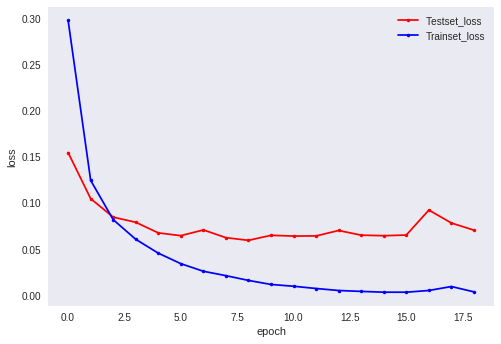

In [0]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

